In [29]:
import pandas as pd

pd.options.plotting.backend = "plotly"

In [30]:
df = pd.read_csv(
    "https://covid.ourworldindata.org/data/owid-covid-data.csv",
    parse_dates=["date"],
)[["location", "new_cases", "date","iso_code"]]
fdf = df.query('~iso_code.str.contains("^OWID")')
fdf.head(10)

,location,new_cases,date,iso_code
0,Afghanistan,5.0,2020-02-24,AFG
1,Afghanistan,0.0,2020-02-25,AFG
2,Afghanistan,0.0,2020-02-26,AFG
3,Afghanistan,0.0,2020-02-27,AFG
4,Afghanistan,0.0,2020-02-28,AFG
5,Afghanistan,0.0,2020-02-29,AFG
6,Afghanistan,0.0,2020-03-01,AFG
7,Afghanistan,0.0,2020-03-02,AFG
8,Afghanistan,0.0,2020-03-03,AFG
9,Afghanistan,0.0,2020-03-04,AFG


In [31]:
loc_grp = fdf.groupby("location")
loc_grp.first()

,new_cases,date,iso_code
location,,,
Afghanistan,5.0,2020-02-24,AFG
Albania,2.0,2020-02-25,ALB
Algeria,1.0,2020-02-25,DZA
Andorra,1.0,2020-03-02,AND
Angola,1.0,2020-03-20,AGO
...,...,...,...
Wallis and Futuna,1.0,2020-10-19,WLF
Western Sahara,NaN,2022-04-20,ESH
Yemen,1.0,2020-04-10,YEM


In [32]:
top5 = loc_grp.new_cases.agg(["sum"]).sort_values(by=["sum"], ascending=False).head(5)

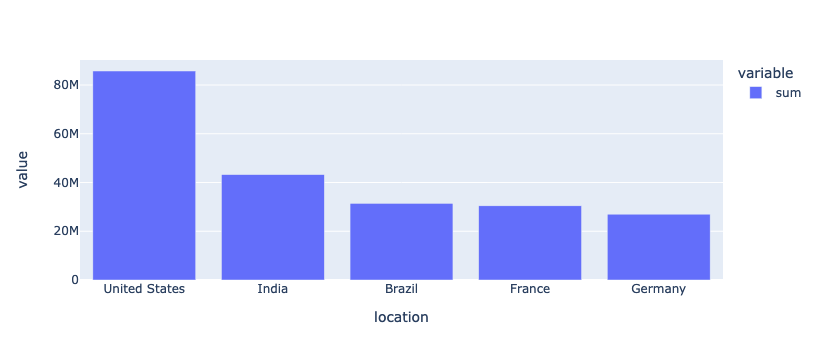

In [33]:
fig = top5.plot.bar()
fig.show()